## 군집화(Clustering)
: 데이터 포인트들을 별개의 군집으로 그룹화. 서로 다른 군집들이 상이성을 가지도록 그룹화.

### 군집화 활용 분야
- 고객, 마켓, 브랜드 등 세분화(Segmentation) -> 즉, 특정 유형들로 분류
- 이상 검출
-> 핵심 질문: 어떻게 유사성을 정의할 것인가?

### 군집화 알고리즘
1. K-Means : Centroid 기반 클러스터링
2. Mean Shift
3. Gaussian Mixture Model
4. DBSCAN

### K-Means Clustering
<img src=https://blog.kakaocdn.net/dn/byzYQP/btrETShnrBD/gNHUXifP1kaFk2LZMMUB60/img.png width=1000>

### 사이킷런 KMeans 클래스

<img src=https://blog.kakaocdn.net/dn/cUOayp/btrEOvhdQPS/dksXyw7CbB2Orbk6TixnWk/img.png width=1000><br>

    주요 파라미터   
    
1. n_clusters : centroid 개수
2. init='k-means++' : centroid를 처음에 둘때 아무데나 두면 반복횟수가 너무 많아질 수 있기 때문에 적절한 위치에 두어야한다. 그 위치를 구하는 알고리즘 이름이 'k-means++' 이다.
3. max_iter=300 : 최대 반복 횟수<br>


    주요 속성
    
1. labels_ : 모든 데이터에 대해 어떤 군집(label)에 속하는지 리스트
2. cluster_conters_ : 모든 centroid의 좌표 리스트

## K-Means 실습

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print(f"타겟값:",*enumerate(iris.target_names))
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

타겟값: (0, 'setosa') (1, 'versicolor') (2, 'virginica')


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### **KMeans 객체를 생성하고 군집화 수행**
- labels_ 속성을 통해 각 테이터 포인트별로 할당된 군집 중심점(Centroid)확인
- fit_predict()하면 labels_ 값 반환
- fit_transform() 수행 결과 확인

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [15]:
print(f"개별 데이터들이 어느 군집에 할당되었는지:\n{kmeans.labels_}")
print(f"\n{kmeans.labels_.shape}, {irisDF.shape} -> shape를 보면 row가 같다\n")
print(f"predict 결과값은 fit한 뒤 labels_값과 같다\n{kmeans.predict(irisDF)}")

개별 데이터들이 어느 군집에 할당되었는지:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

(150,), (150, 4) -> shape를 보면 row가 같다

predict 결과값은 fit한 뒤 labels_값과 같다
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [17]:
# 각 Centroid와의 거리값
## ex 1번 행의 값 [3.41925061, 0.14135063, 5.0595416 ] -> 0번과 3.41, 1번과 0.14, 2번과 5.05로
## 1번과 가장 가깝다 -> 1번으로 군집화
kmeans.fit_transform(irisDF)[:5]

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388]])

### 군집화 결과 추가(cluster 컬럼) - target값과 비교
**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

In [19]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
irisDF.head(5)
# target값에서 0(세토사)이고, cluster에서는 세토사가 1이다.

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [18]:
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
## 0(세토사)가 50개 모두 cluster에서 1(세토사)로 매핑되었다.
## 1(버시칼라)가 대부분 cluster에서 0(버시칼라)로 매핑되었는데, 소수 cluster에서 2(버지니카)로 매핑되었다.
## 2(버지니카)가 50개중 36개가 cluster에서 2(버지니카)로 매핑되었는데, 14개가 0(버시칼라)로 매핑되었다.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 2차원 PCA를 활용한 K-Means 클러스터링 시각화
**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
print(f"pca_transformed.shape: {pca_transformed.shape}")
# irisDF에 pca_transformed를 x,y에 각각 할당 
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

pca_transformed.shape: (150, 2)


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [32]:
## 그래프 스타일 설정
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white';plt.rcParams['axes.labelsize']= 17
plt.rcParams['axes.titlecolor']= 'white';plt.rcParams['axes.titlesize']= 20
plt.rcParams['figure.figsize'] = (10,6)

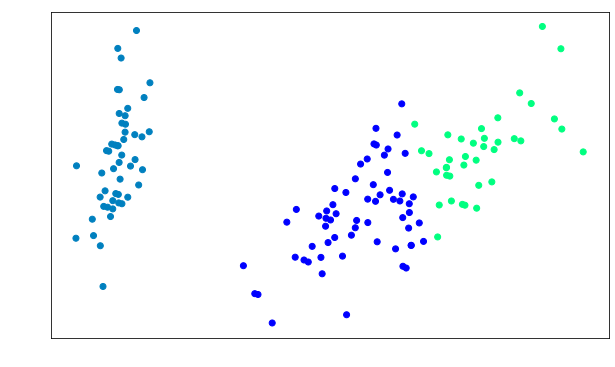

In [33]:
## pca_x, pca_y 시각화
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster'], cmap='winter') 
plt.show()

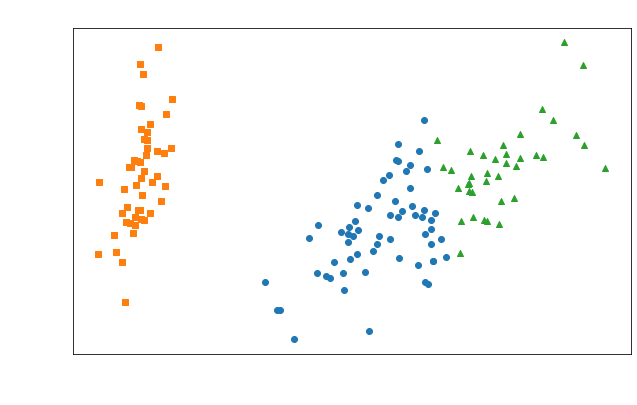

In [34]:
## 위 그래프와 동일하지만, 각 클러스터별로 모양을 다르게 하는 예제를 위해 아래코드를 짬 -> 교재가 흑백이기 때문
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성 

### make_blobs 함수 - 테스트 데이터 생성
: 군집화에 활용하기 좋은 임의의 테스트 데이터 생성 함수

    주요 매개변수


* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  
<br>

* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다. 
<br>

* centers(int): **군집화를 시뮬레이션 할 수 있게 유사 군집화 Centroid를 3개 만들어줌**<br>
예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집중심점의 좌표를 의미합니다.
<br>

* cluster_std: **생성될 군집 데이터의 표준 편차**를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(f"피처 데이터(X) shape: {X.shape}, 타겟 데이터(y) shape: {y.shape}")

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True) # return_counts를 True로 하면, 각 unique값이 몇개인지 counts도 반환
print(f"y: {y[:30]}")
print(f"y target 값 종류: {unique}, 각 값 개수(분포): {counts}")

피처 데이터(X) shape: (200, 2), 타겟 데이터(y) shape: (200,)
y: [2 0 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 1 0 2 2 1 0 0 2 0 1 2 2 2]
y target 값 종류: [0 1 2], 각 값 개수(분포): [67 67 66]


In [45]:
import pandas as pd

# 위에서 make_blobs로 만든 테스트 데이터셋을 데이터프레임으로 변환
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


### Scatter 시각화
**make_blob()으로 만들어진 데이터 포인트들을 시각화**

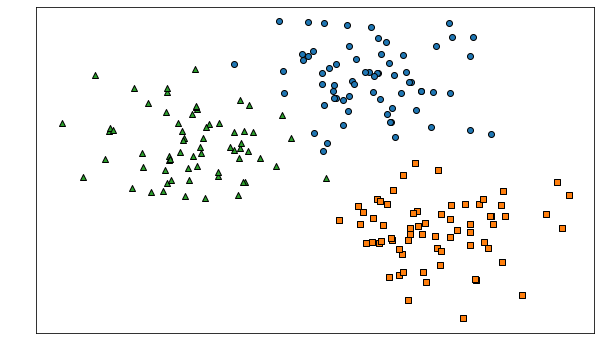

In [47]:
plt.rcParams['figure.figsize']=(10,6)

target_list = np.unique(y) # [0, 1, 2]
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()
## 마커로 구분하는 방법

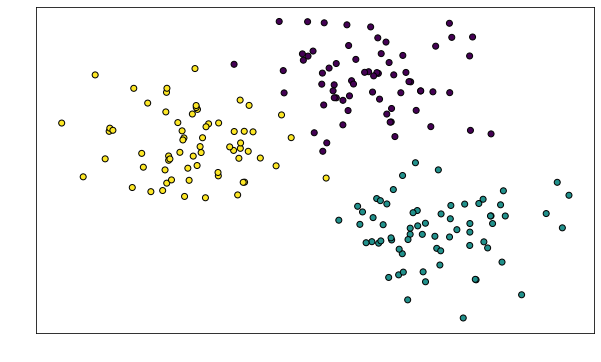

In [49]:
# 마커없이 구분하는 방법(코드는 더 간결)
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )
plt.show()

### **K-Means 클러스터링 -> 중심 위치 시각화**
**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

In [55]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
clusterDF['kmeans_label'] = kmeans.fit_predict(X) # label값 반환

In [58]:
# target값과 kmeans_labels값이 일치하지 않아도, 동일한 타겟값을 지칭할 수 있다.
clusterDF.head(7)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
5,-0.908302,1.970778,2,1
6,2.472119,0.437033,1,2


각 클러스터의 Center 위치
[[ 0.990103    4.44666506]
 [-1.70636483  2.92759224]
 [ 1.95763312  0.81041752]]


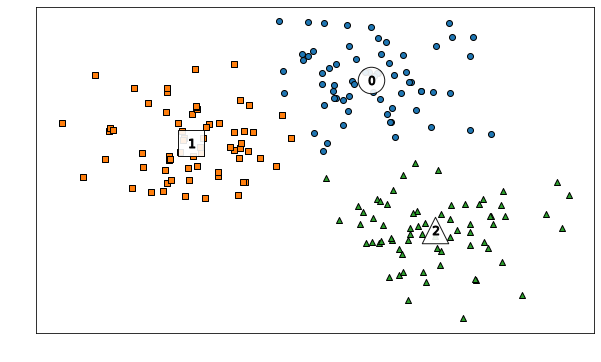

In [69]:
#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
print(f"각 클러스터의 Center 위치\n{centers}")
unique_labels = np.unique(clusterDF['kmeans_label'])
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=700, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label]) ## 센터위치에 도형 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=80, color='k', edgecolor='k', 
                marker=f'${label}$') ## 센터위치에 클러스터 번호 표시

plt.show()

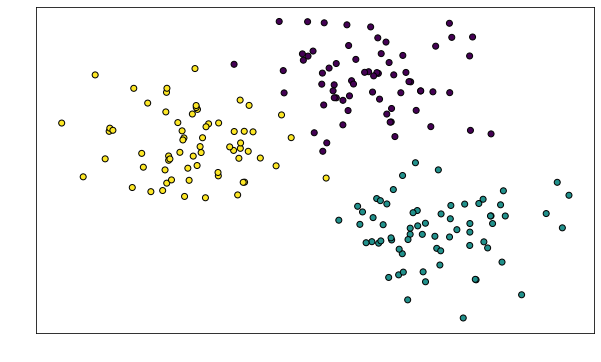

In [70]:
# 마커없이 구분하는 방법(코드는 더 간결)
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )
plt.show()
# 아래 그래프는 타겟 그래프, 위 그래프틑 K-Means Clustering 그래프
## 아래 타겟 그래프에서 동떨어진 노란색점을 보면 1번 타겟인데, 위를 보면 2번 클러스터로 잘못 배정된것도 있다.
## 이렇게 경계값에서 약간 잘못맞추는 것 외에는 전체적으로 잘 맞췄다.

In [28]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [30]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
# 결과를 보면 타겟 대비, kmeans_label(클러스터 번호)가 1개 틀리는 정도임을 확인

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
